In [1]:
import os
# os.chdir("../")
# # Set R environment variables using the conda environment path
# r_home = '/sfs/gpfs/tardis/home/jq2uw/llm_nicu_vitalsigns/clip_env/lib/R'
# os.environ['R_HOME'] = r_home
# os.environ['R_LIBS'] = f"{r_home}/library"
# os.environ['R_LIBS_USER'] = os.path.expanduser('~/R/goolf/4.3')
# os.environ['LD_LIBRARY_PATH'] = f"{r_home}/lib:" + os.environ.get('LD_LIBRARY_PATH', '')

import torch
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    torch.cuda.ipc_collect()

from config import *
from data import *
from train import *
from eval import *
from generation import *
from vital2d import *
print("using device: ", device)

Random seed set to 333
using device:  cpu


# Configuration (customizable)

In [2]:

overwrite = True
model_name = 'tmp' 


update_config(
    
    # Eval settings (clip)
    # ts2txt
    y_col = 'ts_description',
    y_levels = ['The time series exhibits a upward linear trend.', 'The time series exhibits a downward linear trend.'],
    y_pred_levels = ['The time series exhibits a upward linear trend.', 'The time series exhibits a downward linear trend.'],
    # txt2ts
    txt2ts_y_cols = ['ts_description'],
    
    
    # Data settings
    text_col = 'ts_description', #'ts_description',
    seq_length = 200,
    downsample = True,
    downsample_size = 100,
    downsample_levels = ['The time series exhibits a upward linear trend.', 'The time series exhibits a downward linear trend.'],
    custom_target_cols = ['ts_description', 'label'], # 'label' is the same as the default "by_label" target
    
    
    # Model settings
    model_name = model_name,
    **{'3d': False},  # Add this line
    embedded_dim = 512,
    concat_embeddings = False,
    clip_mu = False,
    variational = False,
    train_type = 'joint', # or 'vae', 'clip'
    clip_target_type = 'by_target', # or 'by_label'
    
    # Train settings
    batch_size = 512,
    init_lr = 1e-4,
    patience = 200,
    alpha = 1/10,
    num_saves = 1,
    num_epochs = 500,
    
    # Text configuration
    text_config = text_config
)
config_dict = get_config_dict()


# Data

In [ ]:
# change data preparation for a given experiment
with open('prepare_experiment/synthetic.py', 'r') as file:
    exec(file.read())
# prepare model inputs
with open('run/inputs.py', 'r') as file:
    exec(file.read())

After downsampling:
ts_description
The time series exhibits a upward linear trend.      100
The time series exhibits a downward linear trend.    100
Name: count, dtype: int64
After downsampling:
ts_description
The time series exhibits a upward linear trend.      100
The time series exhibits a downward linear trend.    100
Name: count, dtype: int64


final distribution of text prediction
ts_description
The time series exhibits a upward linear trend.      100
The time series exhibits a downward linear trend.    100
Name: count, dtype: int64
ts_description
The time series exhibits a upward linear trend.      100
The time series exhibits a downward linear trend.    100
Name: count, dtype: int64


/Users/joyqiu/Documents/Documents JoyQiu Work/Research/LLMTimeSeries/llm_nicu_vitalsigns/clip_env/lib/python3.11/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


# Model (customizable)

In [4]:
# customize encoder and decoder here. 
ts_encoder = CNNEncoder(ts_dim = ts_f_dim.shape[1], output_dim=config_dict['embedded_dim'], num_channels=[4], kernel_size=50, dropout=0)
ts_decoder = None # default decoder
text_encoder = TextEncoderCNN(text_dim = tx_f_dim.shape[1], output_dim=config_dict['embedded_dim'], num_channels=[4], kernel_size=50, dropout=0)
# overwrite = False
with open('run/model.py', 'r') as file:
    exec(file.read())


Layer (type:depth-idx)                   Param #
VITAL                                    1
├─TSVAEEncoder: 1-1                      --
│    └─LocalNorm: 2-1                    --
│    └─CNNEncoder: 2-2                   --
│    │    └─Sequential: 3-1              205,524
│    └─Linear: 2-3                       262,656
│    └─Linear: 2-4                       262,656
├─TextEncoder: 1-2                       --
│    └─TextEncoderCNN: 2-5               --
│    │    └─Sequential: 3-2              787,156
├─TSVAEDecoder: 1-3                      --
│    └─Sequential: 2-6                   --
│    │    └─Linear: 3-3                  131,328
│    │    └─LeakyReLU: 3-4               --
│    │    └─Linear: 3-5                  65,792
│    │    └─LeakyReLU: 3-6               --
│    │    └─Linear: 3-7                  51,400
Total params: 1,766,513
Trainable params: 1,766,513
Non-trainable params: 0


# Train

Epoch [1/500]
	Training Loss: 789.083984 (clip: 122.543404, vae: 6665.405762)
	Testing Loss: 839.815796 (clip: 123.439072, vae: 7163.767090)
	Learning Rate: 0.000100000
beta: 0.0
Epoch [11/500]
	Training Loss: 784.217407 (clip: 124.676689, vae: 6595.406738)
	Testing Loss: 829.978516 (clip: 121.730988, vae: 7082.475098)
	Learning Rate: 0.000100000
beta: 0.0


/Users/joyqiu/Documents/Documents JoyQiu Work/Research/LLMTimeSeries/llm_nicu_vitalsigns/clip_env/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch [21/500]
	Training Loss: 772.884216 (clip: 118.833931, vae: 6540.502930)
	Testing Loss: 821.934204 (clip: 119.208344, vae: 7027.258789)
	Learning Rate: 0.000100000
beta: 0.0
Epoch [31/500]
	Training Loss: 764.401123 (clip: 122.756081, vae: 6416.450195)
	Testing Loss: 809.498840 (clip: 119.304123, vae: 6901.946777)
	Learning Rate: 0.000100000
beta: 0.0
Epoch [41/500]
	Training Loss: 748.217285 (clip: 129.203201, vae: 6190.140625)
	Testing Loss: 788.937988 (clip: 119.191315, vae: 6697.466309)
	Learning Rate: 0.000100000
beta: 0.0
Epoch [51/500]
	Training Loss: 696.426758 (clip: 120.048431, vae: 5763.782715)
	Testing Loss: 754.731689 (clip: 119.895821, vae: 6348.358887)
	Learning Rate: 0.000100000
beta: 0.0
Epoch [61/500]
	Training Loss: 750.590759 (clip: 122.147820, vae: 6284.429199)
	Testing Loss: 712.771851 (clip: 126.284363, vae: 5864.874512)
	Learning Rate: 0.000100000
beta: 0.0
Epoch [71/500]
	Training Loss: 649.839722 (clip: 148.281769, vae: 5015.579590)
	Testing Loss: 700.86

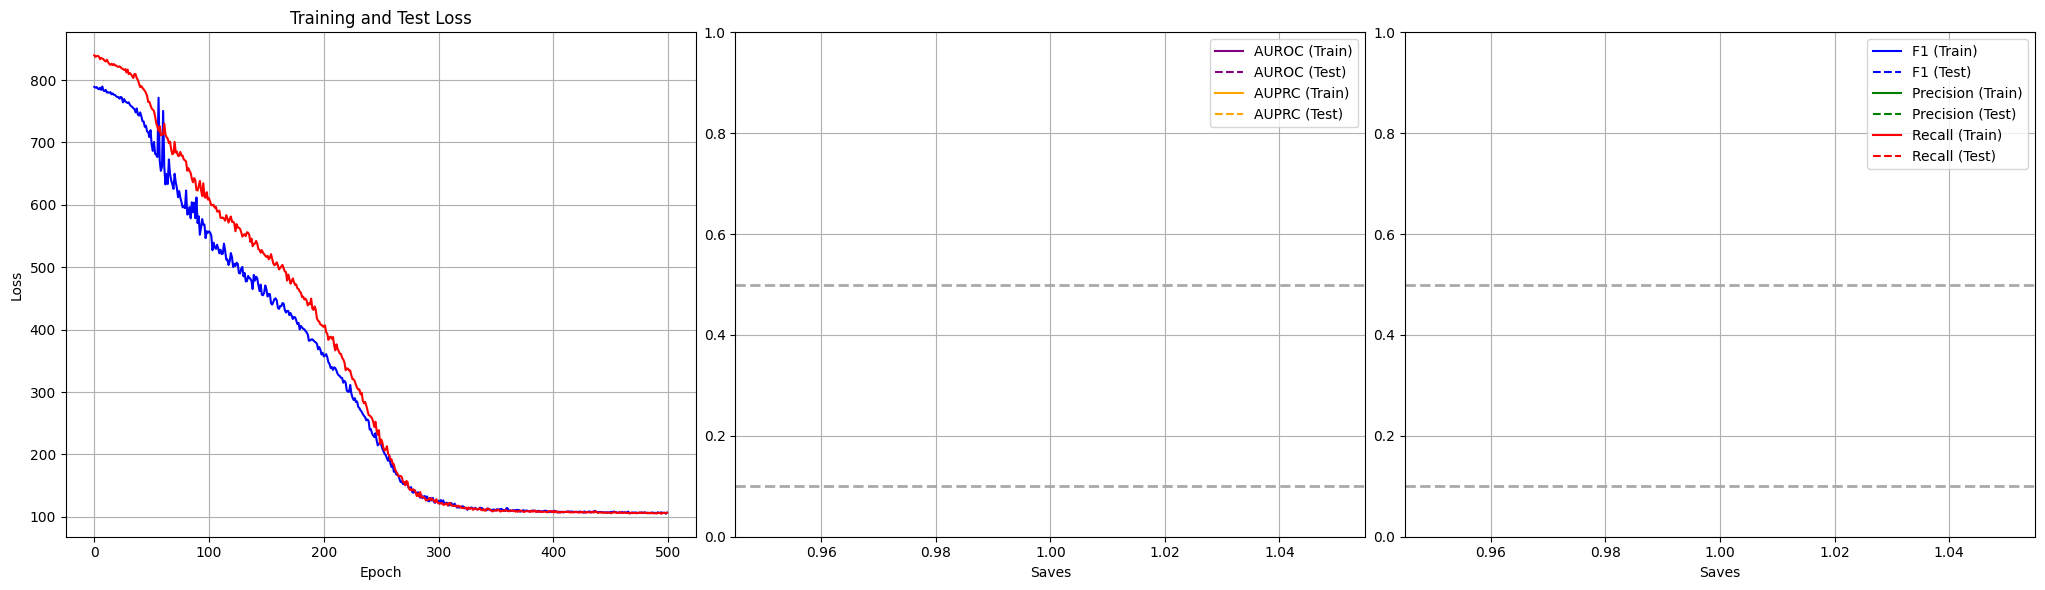

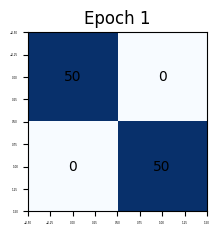

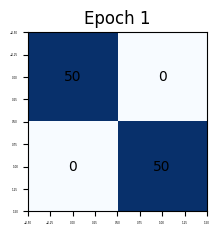

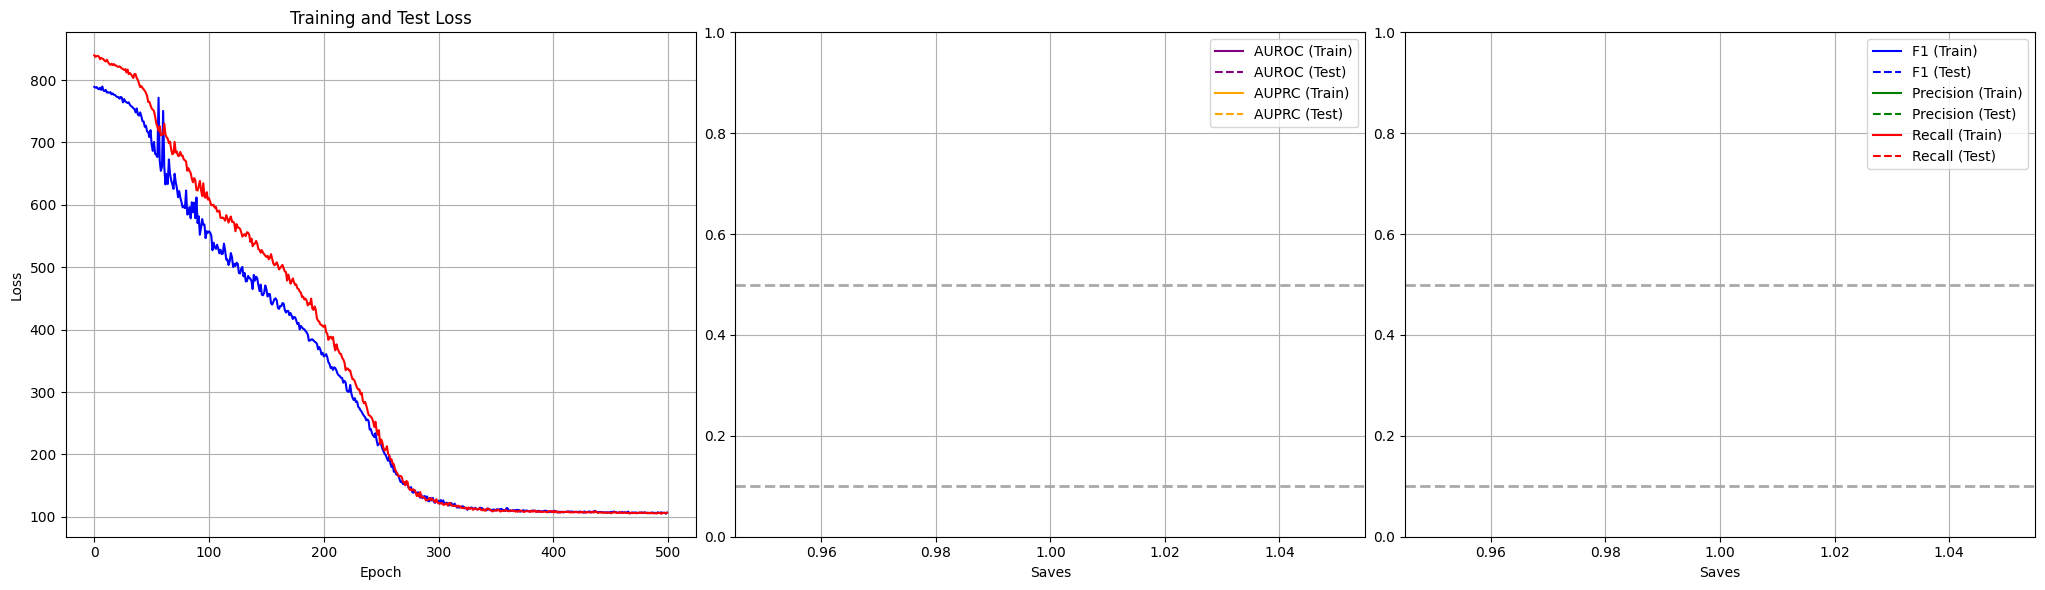

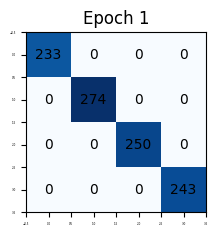

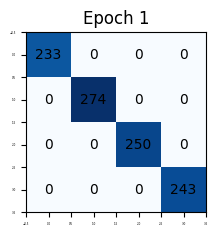

IndexError: positional indexers are out-of-bounds

In [5]:
# overwrite = False
with open('run/train.py', 'r') as file:
    exec(file.read())


# Diagnose

In [6]:
# pairwise_distances, ts2tx_distances = net_emb(df_train, model, config_dict)
# for i in range(95, 105):
#     print(ts2tx_distances['simi']['High amount of consecutive increases.'][i])
#     print(ts2tx_distances['simi']['Low amount of consecutive increases.'][i])
    
# for i in range(95, 105):
#     print(ts2tx_distances['l2']['High amount of consecutive increases.'][i])
#     print(ts2tx_distances['l2']['Low amount of consecutive increases.'][i])

# Generation

0    The time series exhibits a downward linear trend.
Name: text, dtype: object


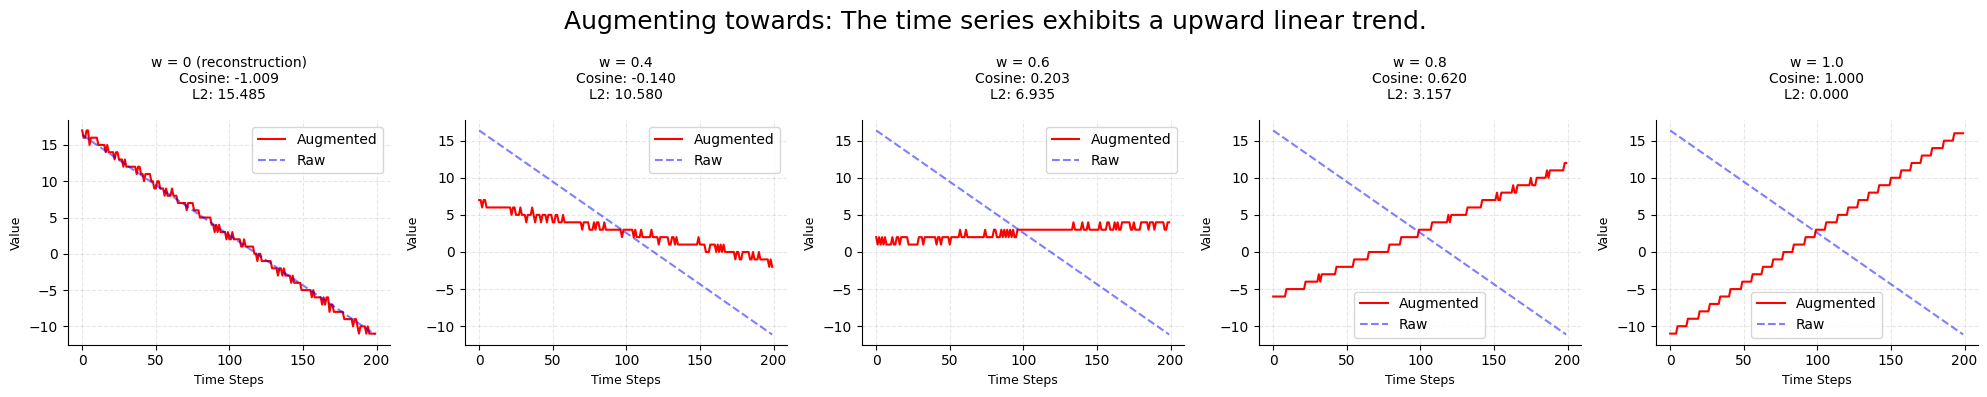

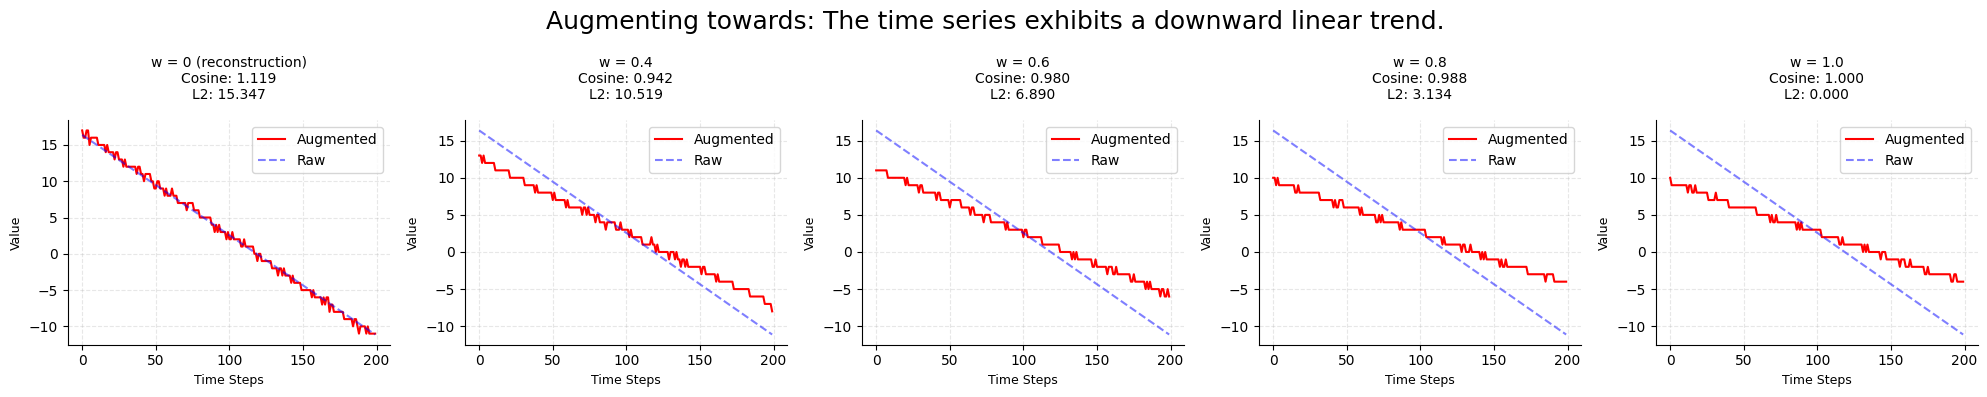

0    The time series exhibits a upward linear trend.
Name: text, dtype: object


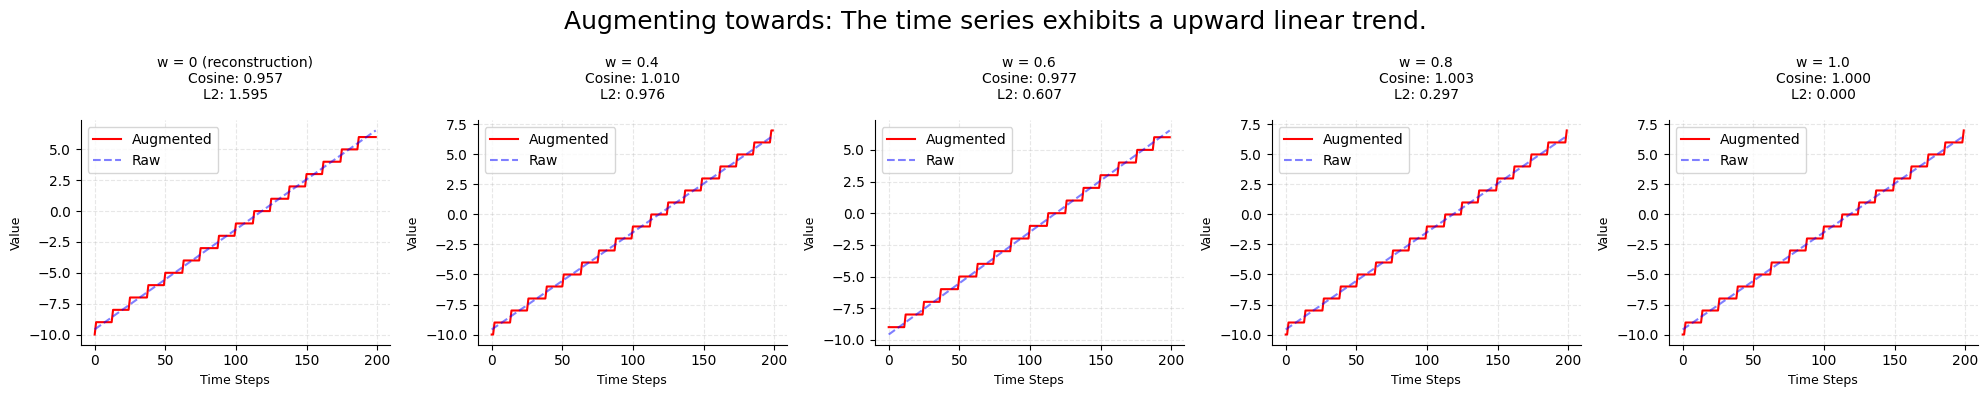

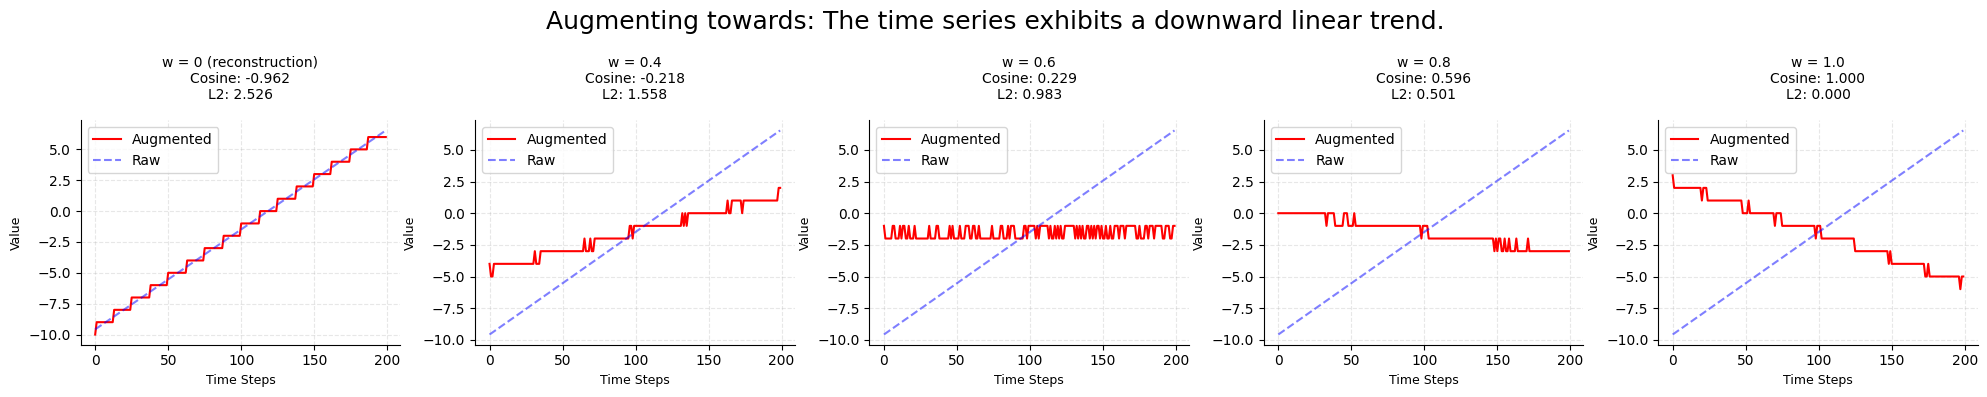

0    The time series exhibits a downward linear trend.
Name: text, dtype: object


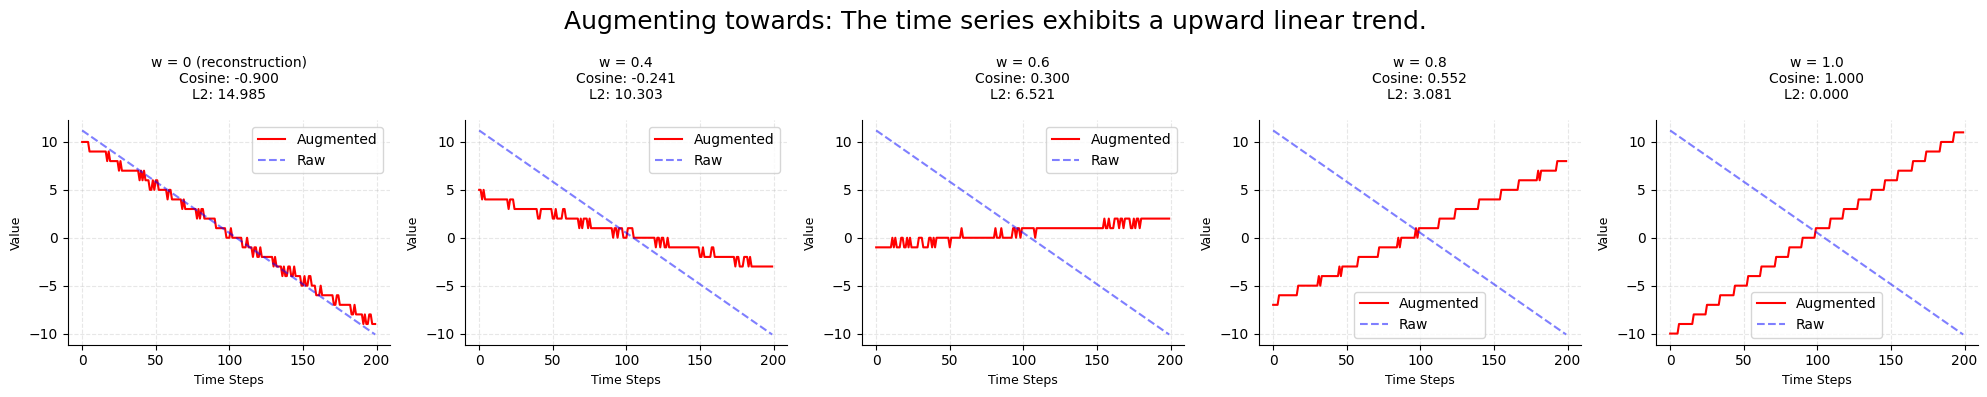

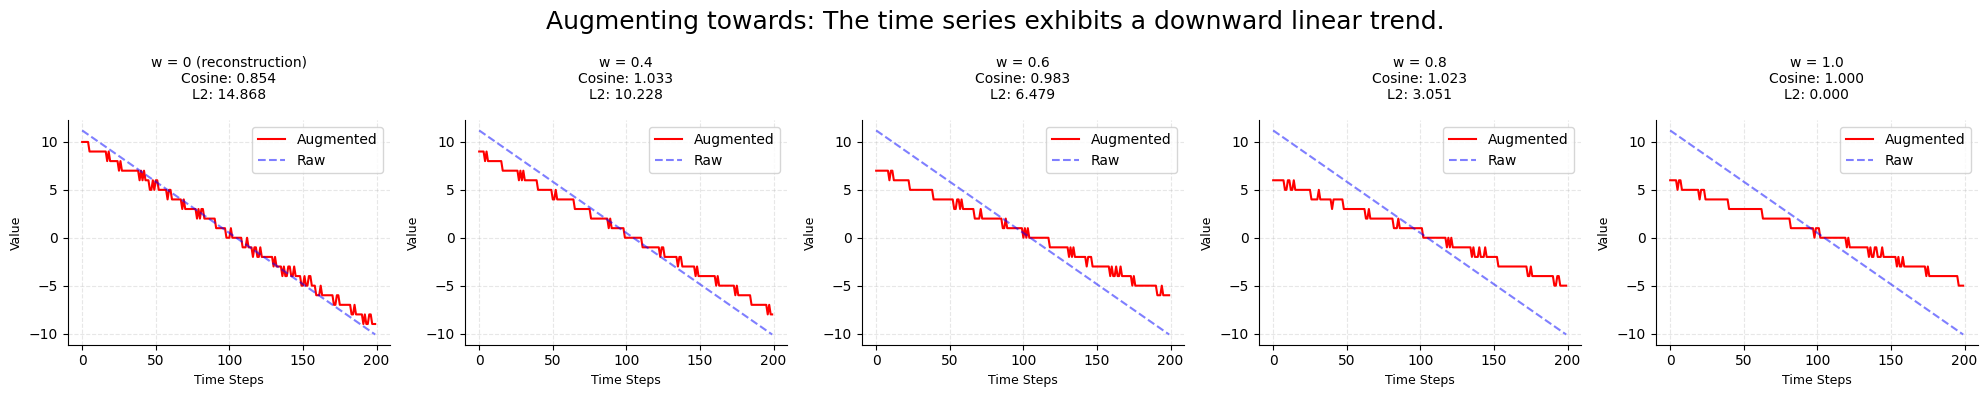

0    The time series exhibits a upward linear trend.
Name: text, dtype: object


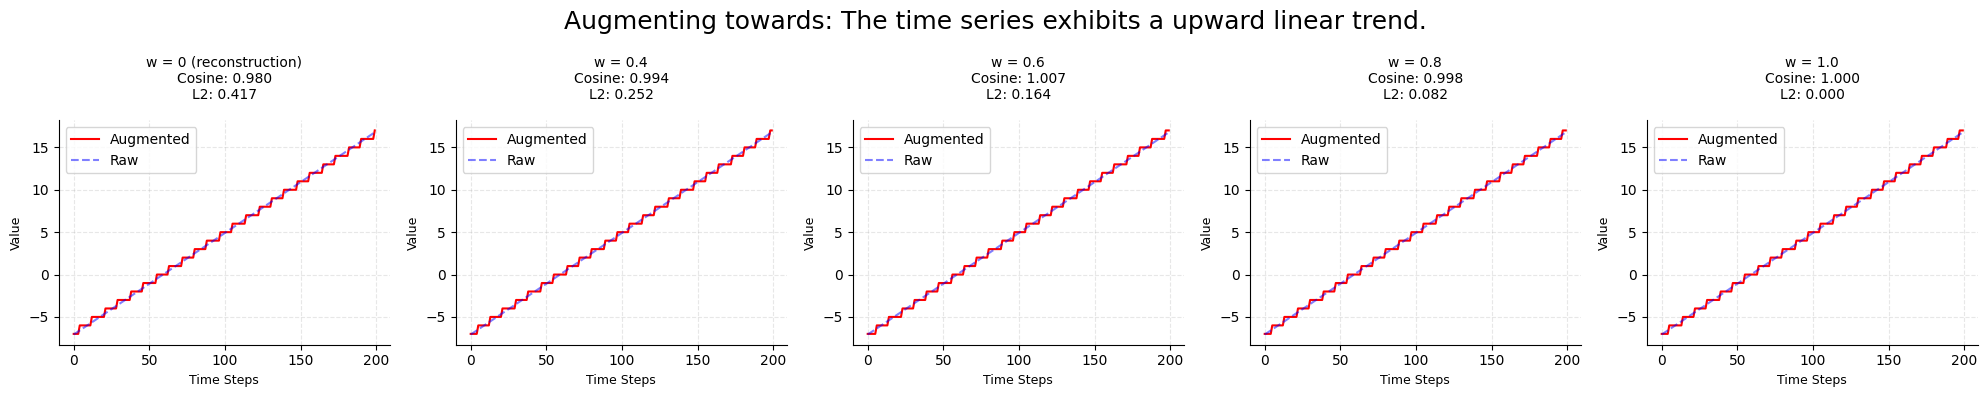

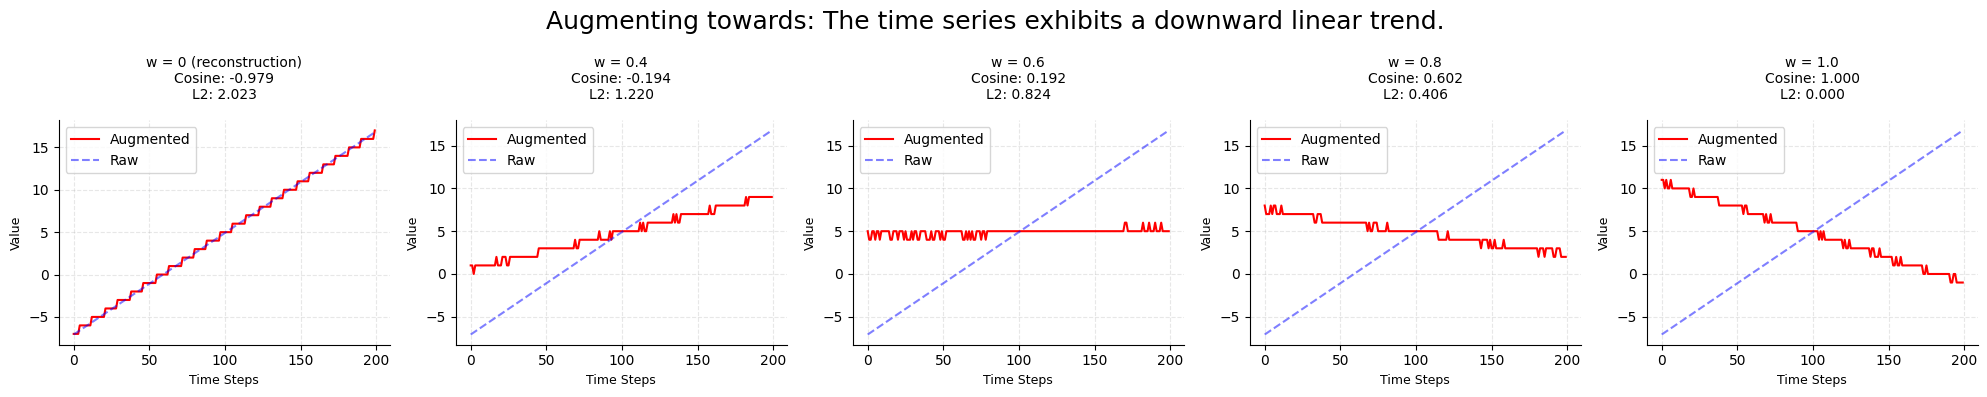

In [7]:
df_train0 = df_train[df_train[config_dict['y_col']] == config_dict['y_levels'][0]].reset_index(drop=True)
df_train1 = df_train[df_train[config_dict['y_col']] == config_dict['y_levels'][1]].reset_index(drop=True)
df_test0 = df_test[df_test[config_dict['y_col']] == config_dict['y_levels'][0]].reset_index(drop=True)
df_test1 = df_test[df_test[config_dict['y_col']] == config_dict['y_levels'][1]].reset_index(drop=True)

tid = 0

df = df_train1.iloc[[tid]].copy()
print(df['text'])
df['text1'] = config_dict['y_levels'][0]
df['text2'] = config_dict['y_levels'][1]
text_cols = ['text1', 'text2']
w_values = np.arange(0.4, 1.2, 0.2)
w_values = np.concatenate([[0], w_values])
plot_interpolate_ts_tx_ws(df, model, config_dict, text_cols, w_values = w_values, label = True)

df = df_train0.iloc[[tid]].copy()
print(df['text'])
df['text1'] = config_dict['y_levels'][0]
df['text2'] = config_dict['y_levels'][1]
text_cols = ['text1', 'text2']
w_values = np.arange(0.4, 1.2, 0.2)
w_values = np.concatenate([[0], w_values])
plot_interpolate_ts_tx_ws(df, model, config_dict, text_cols, w_values = w_values, label = True)




df = df_test1.iloc[[tid]].copy()
print(df['text'])
df['text1'] = config_dict['y_levels'][0]
df['text2'] = config_dict['y_levels'][1]
text_cols = ['text1', 'text2']
w_values = np.arange(0.4, 1.2, 0.2)
w_values = np.concatenate([[0], w_values])
plot_interpolate_ts_tx_ws(df, model, config_dict, text_cols, w_values = w_values, label = True)
df = df_test0.iloc[[tid]].copy()
print(df['text'])
df['text1'] = config_dict['y_levels'][0]
df['text2'] = config_dict['y_levels'][1]
text_cols = ['text1', 'text2']
w_values = np.arange(0.4, 1.2, 0.2)
w_values = np.concatenate([[0], w_values])
plot_interpolate_ts_tx_ws(df, model, config_dict, text_cols, w_values = w_values, label = True)